In [428]:
import numpy as np
import pandas as pd

In [429]:
bigdata=pd.read_csv(r"C:\Users\Prarthana Saikia\Desktop\Praxis\Machine Learning\ML class\codes for exam\datasets\Big Sales Mart\Train_UWu5bXk.csv")
bigdata.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [430]:
x=bigdata['Item_Fat_Content'].value_counts()
x

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [431]:
bigdata['Item_Fat_Content'].replace('LF','Low Fat',inplace=True)
bigdata['Item_Fat_Content'].replace('low fat','Low Fat',inplace=True)
bigdata['Item_Fat_Content'].replace('reg','Regular',inplace=True)

In [432]:
y=bigdata['Item_Fat_Content'].value_counts()
y

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [433]:
bigdata['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [434]:
bigdata.isnull().sum(axis=0)

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [435]:
r=bigdata.mean(axis=0,skipna=True)
x=bigdata['Item_Weight'].mean(axis=0,skipna=True)
bigdata['Item_Weight'].fillna(x,inplace=True)
bigdata['Item_Weight'].isnull().sum(axis=0)    #0 null values

#replace outlet size with mode

m=bigdata['Outlet_Size'].mode()
bigdata['Outlet_Size'].fillna('Medium',inplace=True)
bigdata['Outlet_Size'].isnull().sum(axis=0)

0

In [436]:
bigdata.isnull().sum(axis=0)

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

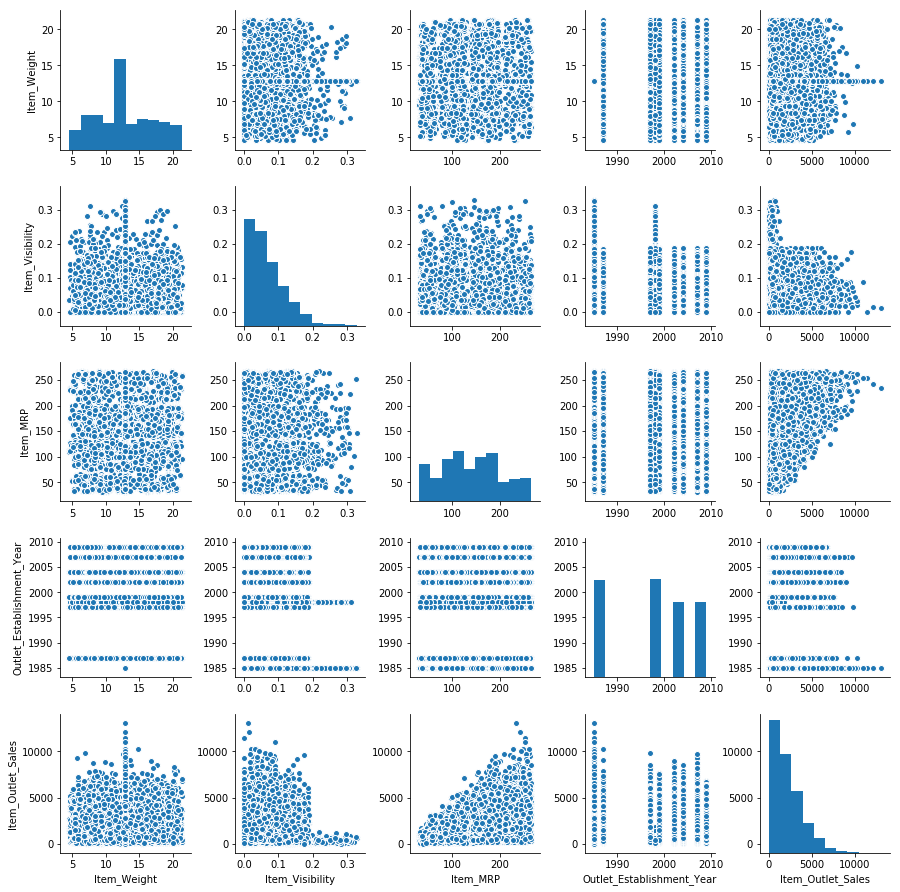

In [437]:
sns.pairplot(bigdata)

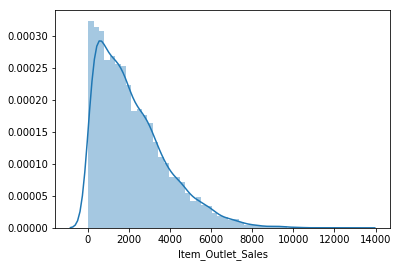

In [284]:
sns.distplot(bigdata['Item_Outlet_Sales'])

In [182]:
#the dataframe by iteself doesnt show categorical variables. no need to delete

corrmatrix=bigdata.corr()
corrmatrix

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.012049,0.024756,-0.008301,0.011550
Item_Visibility,-0.012049,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.024756,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.008301,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.011550,-0.128625,0.567574,-0.049135,1.000000


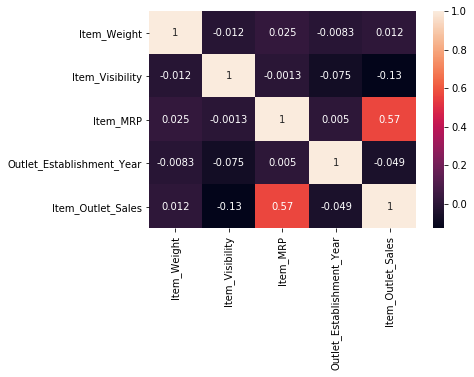

In [283]:
sns.heatmap(bigdata.corr(),annot=True)

In [183]:
bigdata.groupby('Outlet_Establishment_Year').size()

Outlet_Establishment_Year
1985    1463
1987     932
1997     930
1998     555
1999     930
2002     929
2004     930
2007     926
2009     928
dtype: int64

In [36]:
print(bigdata.groupby('Item_Fat_Content').size())

Item_Fat_Content
Low Fat    5517
Regular    3006
dtype: int64


In [38]:
print(bigdata.groupby('Item_Type').size())

Item_Type
Baking Goods              648
Breads                    251
Breakfast                 110
Canned                    649
Dairy                     682
Frozen Foods              856
Fruits and Vegetables    1232
Hard Drinks               214
Health and Hygiene        520
Household                 910
Meat                      425
Others                    169
Seafood                    64
Snack Foods              1200
Soft Drinks               445
Starchy Foods             148
dtype: int64


In [39]:
print(bigdata.groupby('Outlet_Size').size())

Outlet_Size
High       932
Medium    5203
Small     2388
dtype: int64


In [40]:
print(bigdata.groupby('Outlet_Location_Type').size())

Outlet_Location_Type
Tier 1    2388
Tier 2    2785
Tier 3    3350
dtype: int64


In [41]:
print(bigdata.groupby('Outlet_Type').size())

Outlet_Type
Grocery Store        1083
Supermarket Type1    5577
Supermarket Type2     928
Supermarket Type3     935
dtype: int64


In [285]:
saleswithyear=bigdata.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].sum()
saleswithfatcontent=bigdata.groupby('Item_Fat_Content')['Item_Outlet_Sales'].sum()
saleswithitemtype=bigdata.groupby('Item_Type')['Item_Outlet_Sales'].sum()
saleswithoutletsize=bigdata.groupby('Outlet_Size')['Item_Outlet_Sales'].sum()

saleswithlocation=bigdata.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].sum()
saleswithoutlettype=bigdata.groupby('Outlet_Type')['Item_Outlet_Sales'].sum()
t=bigdata.groupby('Item_Identifier')['Item_Outlet_Sales'].sum()
test = t.sort_values(ascending=False)
test.head()

Item_Identifier
FDY55    42661.8008
FDA15    41584.5364
FDZ20    40185.0248
FDF05    36555.7490
FDA04    35741.4756
Name: Item_Outlet_Sales, dtype: float64

In [286]:
itemprice=bigdata.groupby('Item_Identifier')['Item_MRP'].mean()
itemprice
expensive = itemprice.sort_values(ascending=False)
expensive.head()

Item_Identifier
FDR25    265.468400
NCS29    265.455067
FDK51    265.416971
FDS13    265.302686
FDL58    263.956800
Name: Item_MRP, dtype: float64

In [287]:
outlet=bigdata.groupby('Outlet_Identifier')['Item_Outlet_Sales'].sum()
outlet.head()

Outlet_Identifier
OUT010    1.883402e+05
OUT013    2.142664e+06
OUT017    2.167465e+06
OUT018    1.851823e+06
OUT019    1.796941e+05
Name: Item_Outlet_Sales, dtype: float64

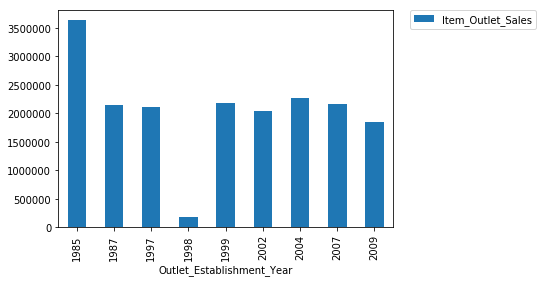

In [43]:
saleswithyear.plot(x='Outlet_Establishment_Year', y='Item_Outlet_Sales', kind='bar')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

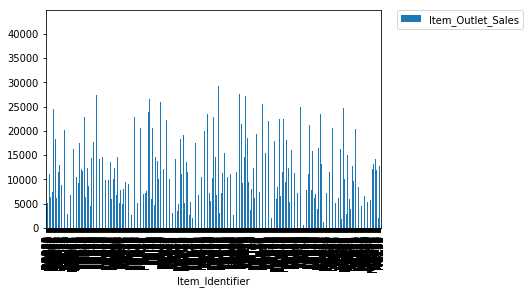

In [69]:
salesofitem.plot(x='Item_Identifier', y='Item_Outlet_Sales', kind='bar')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

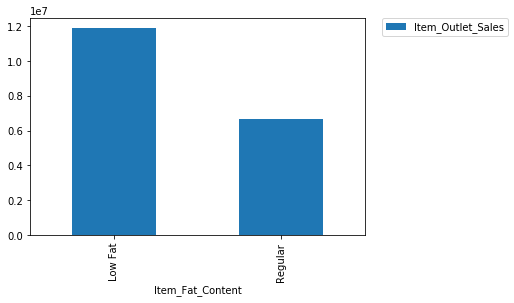

In [44]:
y=saleswithfatcontent.plot(x='Item_Fat_Content', y='Item_Outlet_Sales', kind='bar')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

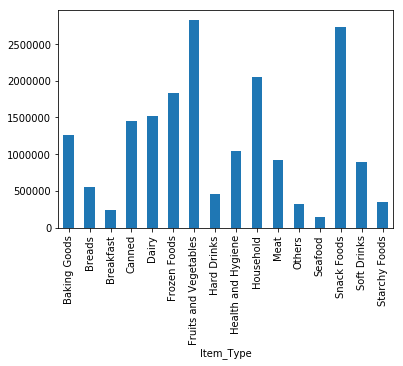

In [184]:
saleswithitemtype.plot(x='Outlet_Identifier', y='Item_Outlet_Sales', kind='bar')
plt.show()

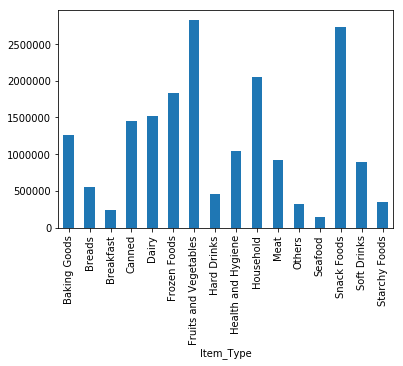

In [185]:
saleswithitemtype.plot(x='Item_Type', y='Item_Outlet_Sales', kind='bar')
plt.show()

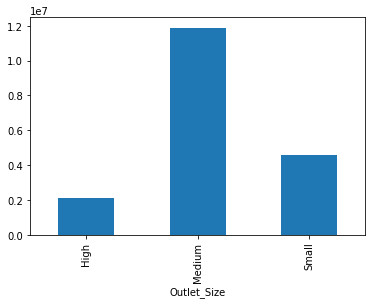

In [46]:
saleswithoutletsize.plot(x='Outlet_Size', y='Item_Outlet_Sales', kind='bar')
plt.show()

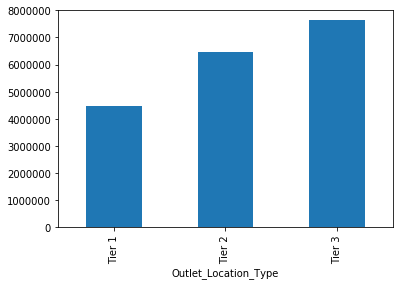

In [47]:
saleswithlocation.plot(x='Outlet_Location_Type', y='Item_Outlet_Sales', kind='bar')
plt.show()

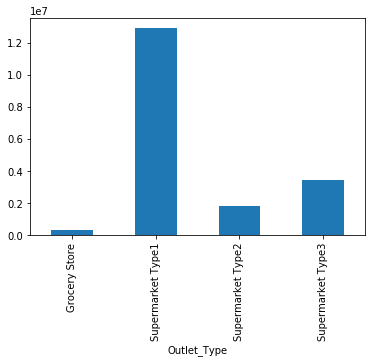

In [48]:
saleswithoutlettype.plot(x='Outlet_Type', y='Item_Outlet_Sales', kind='bar')
plt.show()

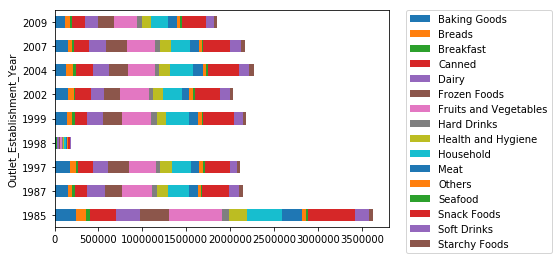

In [50]:
bigdata.groupby(['Outlet_Establishment_Year', 'Item_Type']).sum().unstack().plot(y='Item_Outlet_Sales', kind='barh', stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

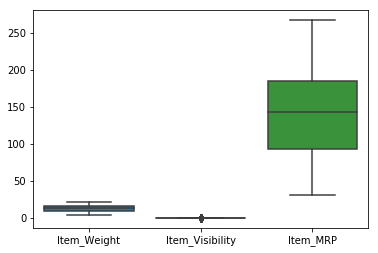

In [52]:
#check for outliers

import seaborn as sns
newbigdata=pd.DataFrame(bigdata,columns=['Item_Weight','Item_Visibility','Item_MRP'])
sns.boxplot(data=newbigdata)

In [53]:
bigdata.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [438]:

x=bigdata['Item_Visibility'].mean(axis=0,skipna=True)
x

0.06613202877895127

In [439]:
#replacing 0 in visibility column
def chief(t):
    if (t==0):
        return x
    else:
        return t


bigdata=bigdata.applymap(lambda t:chief(t))

In [289]:
bigdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  8523 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  8523 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


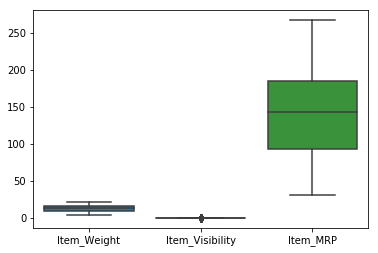

In [86]:
newbigdata1=pd.DataFrame(bigdata,columns=['Item_Weight','Item_Visibility','Item_MRP'])
sns.boxplot(data=newbigdata1)




we conclude there are no outliers

In [88]:
bigdata

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200000,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930000,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395000,Regular,0.066132,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,12.857645,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200000,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Medium,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200000,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Medium,Tier 2,Supermarket Type1,4710.5350


In [440]:

food=['Fruits and Vegetables','Snack Foods','Dairy','Frozen Foods','Meat','Baking Goods','Breads','Breakfast','Canned','Starchy Foods','Seafood']
DR=['Soft Drinks','Hard Drinks']
NC=['Household','Health and Hygeine','Others']

def chief(tt):
    if tt in NC:
        return 0
    elif tt in DR:
        return 1
    else:
        return 2


bigdata['Item_Type']=bigdata['Item_Type'].map(lambda tt:chief(tt))
bigdata

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300000,Low Fat,0.016047,2,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920000,Regular,0.019278,1,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500000,Low Fat,0.016760,2,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200000,Regular,0.066132,2,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930000,Low Fat,0.066132,0,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395000,Regular,0.066132,2,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650000,Regular,0.012741,2,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,12.857645,Low Fat,0.127470,2,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200000,Regular,0.016687,2,96.9726,OUT045,2002,Medium,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200000,Regular,0.094450,2,187.8214,OUT017,2007,Medium,Tier 2,Supermarket Type1,4710.5350


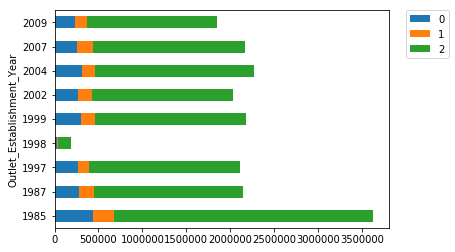

In [162]:
bigdata.groupby(['Outlet_Establishment_Year', 'Item_Type']).sum().unstack().plot(y='Item_Outlet_Sales', kind='barh', stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

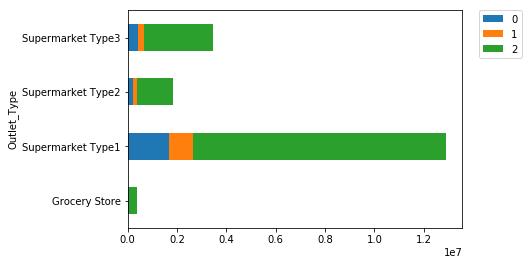

In [163]:
bigdata.groupby(['Outlet_Type', 'Item_Type']).sum().unstack().plot(y='Item_Outlet_Sales', kind='barh', stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [441]:
#creating dummy variables

dummy1=pd.get_dummies(bigdata['Outlet_Type'])
dummy2=pd.get_dummies(bigdata['Outlet_Location_Type'])
dummy3=pd.get_dummies(bigdata['Outlet_Size'])
dummy4=pd.get_dummies(bigdata['Item_Fat_Content'])


#k-1 columns

dummy11=pd.get_dummies(bigdata['Outlet_Type'],drop_first=True)
dummy22=pd.get_dummies(bigdata['Outlet_Location_Type'],drop_first=True)
dummy33=pd.get_dummies(bigdata['Outlet_Size'],drop_first=True)
dummy44=pd.get_dummies(bigdata['Item_Fat_Content'],drop_first=True)
dummy11.head()

,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,1,0,0
1,0,1,0
2,1,0,0
3,0,0,0
4,1,0,0


In [442]:



dummy_Itemtype=pd.get_dummies(bigdata['Item_Type'],prefix=['Item_Type'])


#k-1columns

dummy_Itemtype11=pd.get_dummies(bigdata['Item_Type'],prefix=['Item_Type'],drop_first=True)


In [443]:
ST=bigdata.drop(['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type'],axis=1)
ST.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,3735.1380
1,5.92,0.019278,48.2692,2009,443.4228
2,17.50,0.016760,141.6180,1999,2097.2700
3,19.20,0.066132,182.0950,1998,732.3800
4,8.93,0.066132,53.8614,1987,994.7052


In [444]:
bigdata_updated=pd.concat([ST,dummy1,dummy2,dummy3,dummy4,dummy_Itemtype],axis=1)
bigdata_updated.head()

bigdata_updated11=pd.concat([ST,dummy11,dummy22,dummy33,dummy44,dummy_Itemtype11],axis=1)
bigdata_updated11.head()


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Supermarket Type1,Supermarket Type2,Supermarket Type3,Tier 2,Tier 3,Medium,Small,Regular,['Item_Type']_1,['Item_Type']_2
0,9.30,0.016047,249.8092,1999,3735.1380,1,0,0,0,0,1,0,0,0,1
1,5.92,0.019278,48.2692,2009,443.4228,0,1,0,0,1,1,0,1,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,1,0,0,0,0,1,0,0,0,1
3,19.20,0.066132,182.0950,1998,732.3800,0,0,0,0,1,1,0,1,0,1
4,8.93,0.066132,53.8614,1987,994.7052,1,0,0,0,1,0,0,0,0,0


In [445]:

import numpy as np
from sklearn.ensemble import RandomForestClassifier 
t=bigdata_updated.drop(['Outlet_Establishment_Year','Item_Outlet_Sales'],axis=1)
X=t.iloc[:,0:18]
y=bigdata_updated['Item_Outlet_Sales']

#k-1 dummies
t1=bigdata_updated11.drop(['Outlet_Establishment_Year','Item_Outlet_Sales'],axis=1)
X1=t1.iloc[:,0:13]
y1=bigdata_updated11['Item_Outlet_Sales']


In [446]:
#Data Preprocessing
from sklearn.cross_validation import train_test_split
#X and y are arrays
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size = 0.2, random_state = 0)
#X_train1,X_test1,y_train1,y_test1=train_test_split(X1, y1, test_size = 0.2, random_state = 0)

In [427]:
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics
lasso = LassoLarsCV()

model=rf.fit(X_train,y_train)
predictions = rf.predict(X_test)
scores = cross_val_score(model, X, y, cv=6)
print(scores)

C:\Users\Prarthana Saikia\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:313: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 7 iterations, i.e. alpha=2.040e-01, with an active set of 7 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
C:\Users\Prarthana Saikia\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:313: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 9 iterations, i.e. alpha=1.215e-01, with an active set of 9 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
C:\Users\Prarthana Saikia\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:313: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 11 iterations, i.e. alpha=7.558e-02, with an active set of 11 regresso

C:\Users\Prarthana Saikia\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:313: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 10 iterations, i.e. alpha=7.861e-02, with an active set of 10 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
C:\Users\Prarthana Saikia\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:313: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 11 iterations, i.e. alpha=5.920e-02, with an active set of 11 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
C:\Users\Prarthana Saikia\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:313: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 12 iterations, i.e. alpha=2.175e-02, with an active set of 12 regr

C:\Users\Prarthana Saikia\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:313: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 11 iterations, i.e. alpha=4.512e-02, with an active set of 11 regressors, and the smallest cholesky pivot element being 1.054e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
C:\Users\Prarthana Saikia\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:313: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 13 iterations, i.e. alpha=3.017e-02, with an active set of 13 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
C:\Users\Prarthana Saikia\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:313: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 13 iterations, i.e. alpha=2.036e-02, with an active set of 13 regr

[ 0.56871821  0.55268028  0.53933843  0.57204705  0.56937554  0.55919253]


In [397]:

import pandas as pd
#from sklearn.ensemble import RandomForestRegressor
#rf = RandomForestRegressor() 
#rf.fit(X_train,y_train) 
#feature_importances = pd.DataFrame(rf.feature_importances_,
                                   #index = X_train.columns,
                                    #columns=['importance']).sort_values('importance', ascending=False)
#print(feature_importances)
#X_important_train = pd.DataFrame(data=X_train,columns=['Item_MRP','Grocery Store','Item_Visibility','Item_Weight'])
#X_important_test = pd.DataFrame(data=X_test,columns=['Item_MRP','Grocery Store','Item_Visibility','Item_Weight'])

#RMSE drops if we delete important features
#import matplotlib.pyplot as plt
#%matplotlib inline
#feature_importances.plot(kind='barh')

In [415]:

#using random forest regressor
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators=12, min_samples_split=3)
# Train the model on training data
rf.fit(X_train,y_train)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=3,
           min_weight_fraction_leaf=0.0, n_estimators=12, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [416]:
# Use the forest's predict method on the test data
predictions = rf.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 839.73 degrees.
Accuracy: 37.42 %.


In [380]:
#linear regression model for k dummies
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_train,y_train)
print("Estimated intercept coefficient:",lm.intercept_)
print("Number of coefficients:",len(lm.coef_))




Estimated intercept coefficient: -117.202231299
Number of coefficients: 18


In [381]:
lm.coef_

array([ -1.54054016e+00,   7.53120070e+00,   1.55362252e+01,
        -1.73114479e+03,   2.41486820e+02,  -1.18220143e+02,
         1.60787811e+03,  -2.18268040e+01,   4.18893099e+00,
         1.76378731e+01,  -5.09370609e+01,   1.74390291e+01,
         3.34980318e+01,  -1.86684934e+01,   1.86684934e+01,
        -9.17612129e+00,  -9.54588223e+00,   1.87220035e+01])

In [382]:
X_train.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Grocery Store',
       'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3', 'Tier 1',
       'Tier 2', 'Tier 3', 'High', 'Medium', 'Small', 'Low Fat', 'Regular',
       '['Item_Type']_0', '['Item_Type']_1', '['Item_Type']_2'],
      dtype='object')

In [383]:
cdf=pd.DataFrame(lm.coef_,index=X_train.columns,columns=['Coeff'])
cdf

,Coeff
Item_Weight,-1.540540
Item_Visibility,7.531201
Item_MRP,15.536225
Grocery Store,-1731.144789
Supermarket Type1,241.486820
Supermarket Type2,-118.220143
Supermarket Type3,1607.878113
Tier 1,-21.826804
Tier 2,4.188931
Tier 3,17.637873


In [384]:
predictions=lm.predict(X_test)
predictions

array([ 2603.2720457 ,  2508.94925729,  2142.8508217 , ...,  4158.26261966,
       -1034.89208244,  5381.0907829 ])

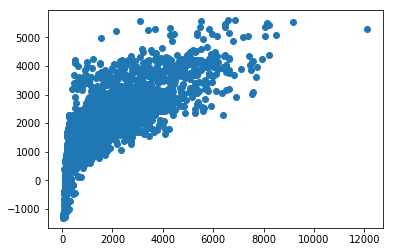

In [385]:
plt.scatter(y_test,predictions)

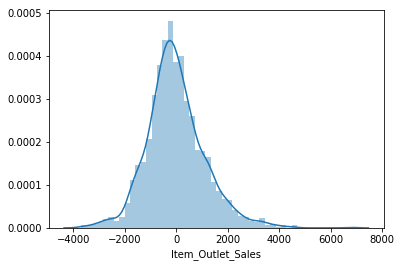

In [303]:
sns.distplot((y_test-predictions))

plotting residuals. normally distributed residuals means model was a good choice for the data

In [386]:
from sklearn import metrics
mse=metrics.mean_squared_error(y_test,predictions)
rmse=np.sqrt(mse)
rmse

1130.4353190989234

In [396]:
lm.score(X_test, y_test)

0.56339413242934078

In [456]:
from sklearn.linear_model import LassoLarsCV

model=LassoLarsCV(cv=8, precompute=False).fit(X_train,y_train)


cdf1=pd.DataFrame(model.coef_,index=X_train.columns,columns=['Coeff'])
cdf1

C:\Users\Prarthana Saikia\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:339: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 15 iterations, alpha=2.516e-02, previous alpha=1.776e-02, with an active set of 14 regressors.
  ConvergenceWarning)


,Coeff
Item_Weight,-0.353734
Item_Visibility,-135.029204
Item_MRP,15.440354
Grocery Store,-1928.243935
Supermarket Type1,0.000000
Supermarket Type2,-306.553196
Supermarket Type3,1385.395640
Tier 1,0.000000
Tier 2,19.159934
Tier 3,0.000000


Text(0.5,1,'Regression Coefficients Progression for Lasso Paths')

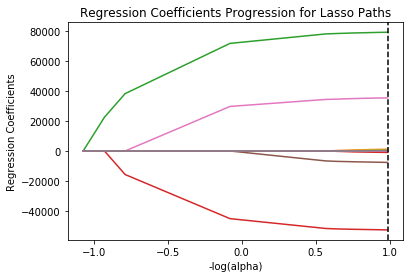

In [418]:
# plot coefficient progression
m_log_alphas = -np.log10(model.alphas_)
ax = plt.gca()
plt.plot(m_log_alphas, model.coef_path_.T)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha CV')
plt.ylabel('Regression Coefficients')
plt.xlabel('-log(alpha)')
plt.title('Regression Coefficients Progression for Lasso Paths')

In [457]:
# MSE from training and test data
from sklearn.metrics import mean_squared_error
predictions = model.predict(X_test)

mse = mean_squared_error(y_test,predictions)
print(mse)
rmse=np.sqrt(mse)
print(rmse)

1276110.87528
1129.65077581


In [458]:
# R-square from training and test data

score_lasso=model.score(X_test,y_test)
score_lasso


0.56399994743773529

In [459]:
bigdata_test=pd.read_csv(r"C:\Users\Prarthana Saikia\Desktop\Praxis\Machine Learning\ML class\codes for exam\datasets\Big Sales Mart\Test_u94Q5KV.csv")
bigdata_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [460]:
bigdata_test['Item_Fat_Content'].replace('LF','Low Fat',inplace=True)
bigdata_test['Item_Fat_Content'].replace('low fat','Low Fat',inplace=True)
bigdata_test['Item_Fat_Content'].replace('reg','Regular',inplace=True)

In [461]:
bigdata_test.isnull().sum(axis=0)

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [462]:
r=bigdata_test.mean(axis=0,skipna=True)
x=bigdata_test['Item_Weight'].mean(axis=0,skipna=True)
bigdata_test['Item_Weight'].fillna(x,inplace=True)
bigdata['Item_Weight'].isnull().sum(axis=0)    #0 null values

#replace outlet size with mode

m=bigdata_test['Outlet_Size'].mode()
bigdata_test['Outlet_Size'].fillna('Medium',inplace=True)
bigdata_test['Outlet_Size'].isnull().sum(axis=0)

0

In [463]:
x=bigdata['Item_Visibility'].mean(axis=0,skipna=True)
#replacing 0 in visibility column
def chief(t):
    if (t==0):
        return x
    else:
        return t


bigdata_test=bigdata_test.applymap(lambda t:chief(t))

In [464]:
food=['Fruits and Vegetables','Snack Foods','Dairy','Frozen Foods','Meat','Baking Goods','Breads','Breakfast','Canned','Starchy Foods','Seafood']
DR=['Soft Drinks','Hard Drinks']
NC=['Household','Health and Hygeine','Others']

def chief(tt):
    if tt in NC:
        return 0
    elif tt in DR:
        return 1
    else:
        return 2


bigdata_test['Item_Type']=bigdata_test['Item_Type'].map(lambda tt:chief(tt))
bigdata_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750000,Low Fat,0.007565,2,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300000,Regular,0.038428,2,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1
2,NCN55,14.600000,Low Fat,0.099575,0,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store
3,FDQ58,7.315000,Low Fat,0.015388,2,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1
4,FDY38,12.695633,Regular,0.118599,2,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [466]:
#creating dummy variables

dummy1_test=pd.get_dummies(bigdata_test['Outlet_Type'])
dummy2_test=pd.get_dummies(bigdata_test['Outlet_Location_Type'])
dummy3_test=pd.get_dummies(bigdata_test['Outlet_Size'])
dummy4_test=pd.get_dummies(bigdata_test['Item_Fat_Content'])
dummy_Itemtype_test=pd.get_dummies(bigdata_test['Item_Type'],prefix=['Item_Type'])

In [467]:
ST_test=bigdata_test.drop(['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type'],axis=1)
ST_test.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,20.750000,0.007565,107.8622,1999
1,8.300000,0.038428,87.3198,2007
2,14.600000,0.099575,241.7538,1998
3,7.315000,0.015388,155.0340,2007
4,12.695633,0.118599,234.2300,1985


In [468]:
bigdata_updated_test=pd.concat([ST_test,dummy1_test,dummy2_test,dummy3_test,dummy4_test,dummy_Itemtype_test],axis=1)
bigdata_updated_test.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3,Tier 1,Tier 2,Tier 3,High,Medium,Small,Low Fat,Regular,['Item_Type']_0,['Item_Type']_1,['Item_Type']_2
0,20.750000,0.007565,107.8622,1999,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1
1,8.300000,0.038428,87.3198,2007,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1
2,14.600000,0.099575,241.7538,1998,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0
3,7.315000,0.015388,155.0340,2007,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1
4,12.695633,0.118599,234.2300,1985,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1


In [471]:
t_test=bigdata_updated_test.drop(['Outlet_Establishment_Year'],axis=1)
X_testdata=t_test.iloc[:,0:18]

In [475]:
from sklearn.linear_model import LassoLarsCV

model=LassoLarsCV(cv=10, precompute=False).fit(X,y)
result=model.predict(X_testdata)

In [476]:
predict = pd.DataFrame(result, columns=['predictions']).to_csv('prediction.csv')